
Kayıt Sayısı: 994
Veri setinin nitelik sayısı: 19
Veri setinin nitelik tipleri:
Bellek Hızı                object
Cihaz Ağırlığı             object
Ekran Boyutu               object
Ekran Kartı Bellek Tipi    object
Ekran Kartı Hafızası       object
Ekran Kartı Tipi           object
Ekran Panel Tipi           object
İşlemci Nesli              object
İşlemci                    object
İşletim Sistemi            object
Kart Okuyucu               object
Aydınlatma                  int64
Maksimum İşlemci Hızı      object
Max Ekran Çözünürlüğü      object
Parmak İzi Okuyucu         object
Ram (Sistem Belleği)       object
SSD Kapasitesi             object
Ürün Modeli                object
Fiyat                      object
dtype: object


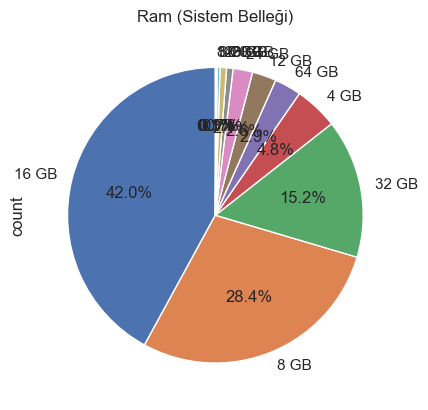

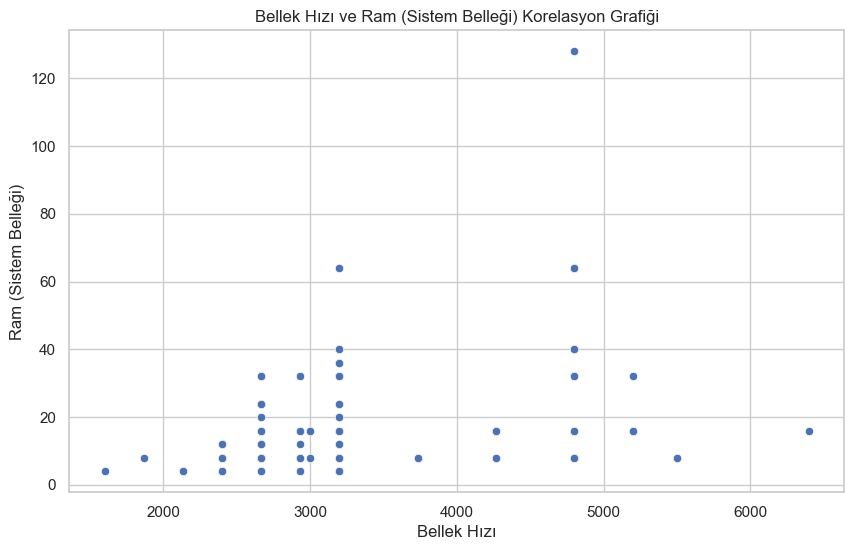


Statistics for column 'Ram (Sistem Belleği)':
Number of records: 994
Number of unique values: 11
Mean: 17.430597771023304
Median: 16.0
Standard Deviation: 12.234855105793104
Variance: 149.69167945975158
Minimum: 4.0
25th Percentile (Q1): 8.0
50th Percentile (Q2 or Median): 16.0
75th Percentile (Q3): 16.0
Maximum: 128.0

Statistics for column 'Bellek Hızı':
Number of records: 994
Number of unique values: 16
Mean: 3339.873873873874
Median: 3200.0
Standard Deviation: 626.283880755451
Variance: 392231.499294108
Minimum: 1066.0
25th Percentile (Q1): 3200.0
50th Percentile (Q2 or Median): 3200.0
75th Percentile (Q3): 3200.0
Maximum: 6400.0
Confusion Matrix:
[[102   5   0   1   0]
 [  7  28   2   0   1]
 [  0   3  13   0   2]
 [  1   0   0  17   0]
 [  0   0   2   0  15]]
Accuracy: 0.8793969849246231


In [6]:

# UMUR EREN ÖZDEMİR 201220012


import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

def preprocess_data(data):
    # Eksik verileri sütun mod değeri ile doldur
    for col in data.columns:
        mode_value = data[col].mode().iloc[0]
        data[col].fillna(mode_value, inplace=True)
    
    # Veri çerçevesini masaüstüne CSV dosyası olarak kaydetme
    data.to_excel(r'C:\Users\user\Desktop\preprocessed_data.xlsx', index=False)

    # Tüm sütunlara label encoding uygulama
    for col in data.columns:
        if data[col].dtype == 'object':  # Sadece kategorik sütunlara işlem uygula
            data[col] = LabelEncoder().fit_transform(data[col].astype(str))

    return data

def preprocess_and_visualize_data(data):
    
    temp1_data = data.copy()
    
    record_count = len(temp1_data)
    print("\nKayıt Sayısı:", record_count)

    # Veri setinin nitelik sayısı
    nitelik_sayisi = len(temp1_data.columns)
    print(f"Veri setinin nitelik sayısı: {nitelik_sayisi}")

    # Veri setinin nitelik tipleri
    nitelik_tipleri = temp1_data.dtypes
    print("Veri setinin nitelik tipleri:")
    print(nitelik_tipleri)



    # Ram sütununun dağılımını gösterme
    temp1_data['Ram (Sistem Belleği)'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Ram (Sistem Belleği)')
    plt.show()



    sutunlar = ['Ram (Sistem Belleği)', 'Bellek Hızı']
    for sutun in sutunlar:
        temp1_data[sutun] = temp1_data[sutun].replace(r'[^\d.,]', '', regex=True)
        temp1_data[sutun] = pd.to_numeric(temp1_data[sutun].str.replace(',', ''), errors='coerce')


    # Korelasyon grafiği
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Bellek Hızı', y='Ram (Sistem Belleği)', data=temp1_data)
    plt.title('Bellek Hızı ve Ram (Sistem Belleği) Korelasyon Grafiği')
    plt.show()

    # İlgili sütunlara yapılan işlemleri genişletme
    columns_to_expand = ['Ram (Sistem Belleği)','Bellek Hızı']
    for col in columns_to_expand:
        # Orijinal veri üzerinde işlemleri gerçekleştirme
        print(f"\nStatistics for column '{col}':")
        print(f"Number of records: {len(temp1_data)}")
        print(f"Number of unique values: {temp1_data[col].nunique()}")
       

        if pd.api.types.is_numeric_dtype(temp1_data[col]):
            print(f"Mean: {temp1_data[col].mean()}")
            print(f"Median: {temp1_data[col].median()}")
            print(f"Standard Deviation: {temp1_data[col].std()}")
            print(f"Variance: {temp1_data[col].var()}") 
            print(f"Minimum: {temp1_data[col].min()}")
            print(f"25th Percentile (Q1): {temp1_data[col].quantile(0.25)}")
            print(f"50th Percentile (Q2 or Median): {temp1_data[col].quantile(0.50)}")
            print(f"75th Percentile (Q3): {temp1_data[col].quantile(0.75)}")
            print(f"Maximum: {temp1_data[col].max()}")
        else:
            print("The column does not contain numeric values.")

    return temp1_data

def classify_data(features, target):
   
    for _ in range(1):  
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=None)  # random_state=None her seferinde farklı parçalama yapar

        # Gradient Boosting sınıflandırma modelini oluşturma
        gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.16, max_depth=3, random_state=42)
        gb_model.fit(X_train, y_train)

        # Test verisi üzerinde tahmin yapma
        y_pred = gb_model.predict(X_test)

        # Konfüzyon matrisini oluşturma
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(conf_matrix)

        # Doğruluk yüzdesini hesapla
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)
        with open("trained_model.pkl", "wb") as file:
         pickle.dump(gb_model, file)

# data.xlsx dosyasını okuma
data = pd.read_excel("C:/Users/user/Desktop/data.xlsx")


temp_data = data.copy()
preprocess_and_visualize_data(temp_data)
# Verileri işle ve sınıflandır
preprocessed_data = preprocess_data(temp_data)
classify_data(preprocessed_data.drop('Fiyat', axis=1), preprocessed_data['Fiyat'])

